In [4]:
# from https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=1
# fitting a classifier

import pandas as pd

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

churn_df = pd.read_csv("telecom_churn_clean.csv")

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [5]:
# Predict the labels for the training data X

import numpy as np

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


Splitting data into train and test sets

In [ ]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

### Testing different values of k

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

churn_df = pd.read_csv("telecom_churn_clean.csv")

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.8627156789197299, 2: 0.8754688672168042, 3: 0.8735933983495874, 4: 0.8709677419354839, 5: 0.8717179294823706, 6: 0.8675918979744937, 7: 0.8687171792948237, 8: 0.86384096024006, 9: 0.8653413353338335, 10: 0.8634658664666166, 11: 0.86384096024006, 12: 0.8615903975993998} 
 {1: 0.7916041979010495, 2: 0.8575712143928036, 3: 0.8500749625187406, 4: 0.8590704647676162, 5: 0.8515742128935532, 6: 0.856071964017991, 7: 0.8500749625187406, 8: 0.8530734632683659, 9: 0.8590704647676162, 10: 0.8590704647676162, 11: 0.8605697151424287, 12: 0.856071964017991}


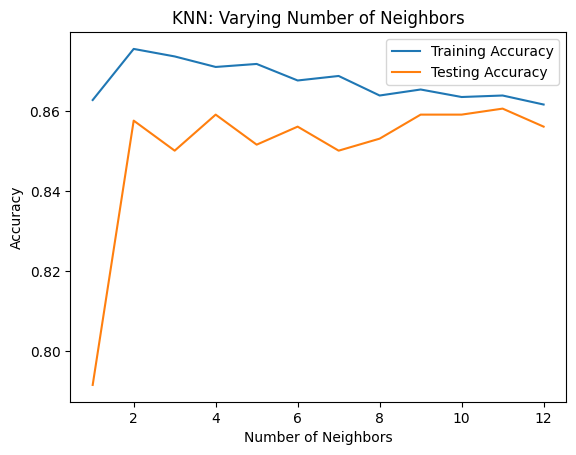

In [14]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()